# Configuração de ambiente

Importação das bibliotecas:
- Numpy: para manipulação de arrays
- Pandas: para manipulação de dataframes
- Matplotlib: para visualização de dados
- Seaborn: para visualização de dados
- Warnings: para poder alterar a visualização de warnings do sistema

E dentre outras para o aprendizado supervisionado.

In [66]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

sns.set()

%matplotlib inline

# Leitura e visualização do dataset

Leitura do arquivo "dataset_clean.csv" através da função "read_csv" do Pandas e armazenamento do resultado na variável "df". Uso do parâmetro "sep" para informar qual o separador de colunas do arquivo e do parâmetro "encoding" para informar qual o tipo de codificação do arquivo.

In [67]:
csv_url = "https://github.com/viniciusgugelmin/data-science-3/blob/main/projects/valorant_stats/data/dataset_clean.csv?raw=true"

df = pd.read_csv(csv_url, sep=';', low_memory=False)

Exibição das 5 primeiras linhas do DataFrame através da função "head" do Pandas para verificar se o arquivo foi carregado corretamente e ter uma ideia do que ele contém.

In [68]:
df.head()

,name,rating,damage_round,headshots,headshot_percent,aces,clutches,flawless,first_bloods,assists,kd_ratio,kills_round,score_round,win_percent,agent_1,gun1_name
0,ShimmyXD,Radiant,135.8,161.0,24.9,0,140,80,161.0,703.0,1.07,0.7,208.8,59.6,Fade,Vandal
1,XSET Cryo,Radiant,170.3,316.0,28.3,2,122,94,316.0,206.0,1.35,1.0,270.6,65.8,Chamber,Vandal
2,PuRelittleone,Radiant,147.5,216.0,24.0,3,117,59,216.0,267.0,1.05,0.8,227.8,65.6,Yoru,Vandal
3,Boba,Radiant,178.2,235.0,37.3,3,83,49,235.0,157.0,1.40,1.0,277.0,62.8,Jett,Vandal
4,i love mina,Radiant,149.8,137.0,24.4,2,71,38,137.0,213.0,1.11,0.8,230.9,62.8,Jett,Vandal


# Explicação sobre o trabalho a ser realizado

O dataset escolhido tem como base informações sobre como os melhores jogadores de Valorant do Episódio 4, Ato 3, se saíram dentro nos seus jogos. 

As colunas a serem trabalhadas contém informações sobre o nome dentro do jogo, elo/rank, dano por rodada, eliminações com tiro na cabeça, percentual de eliminações com tiro na cabeça, rodadas em que eliminou todos sozinho, rodadas em que ficou sozinho e ganhou, em que todos do time eliminaram alguém, rodadas em que foi o primeiro a eliminar, assistência em eliminações, percentual de eliminações e mortes, pontuação por rodada, percentual de vitória, melhor agente e melhor arma.

O intuito deste estudo é extrairmos algumas informações dessa base de dados, inserirmos alguns gráficos e realizarmos um aprendizado de máquina para conseguirmos prever o elo/ranque de um jogador só com base em seus resultados dentro do jogo.

# Perguntas iniciais

- Qual o jogador com maior percentual de vitórias e o com o menor?

In [69]:
def printWinOrder(_df, str):
  print('Jogador com', str, 'percentual de vitórias:', _df['name'][0], '\nPercentual:', _df['win_percent'][0], '\nElo:', _df['rating'][0])

df_win_order = df.copy()

df_win_order = df_win_order.sort_values('win_percent', ascending=False).reset_index().drop('index', axis=1)
printWinOrder(df_win_order, 'maior')

print('')

df_win_order = df_win_order.sort_values('win_percent', ascending=True).reset_index().drop('index', axis=1)
printWinOrder(df_win_order, 'menor')

Jogador com maior percentual de vitórias: L DANCE 69 
Percentual: 79.7 
Elo: Radiant

Jogador com menor percentual de vitórias: prg 
Percentual: 40.2 
Elo: Diamond -


- Qual o jogador com mais aces e o com o menor?

In [70]:
def printAcesOrder(_df, str):
  print('Jogador com', str, 'aces:', _df['name'][0], '\nAces:', _df['aces'][0], '\nElo:', _df['rating'][0])

df_aces_order = df.copy()

df_aces_order = df_aces_order.sort_values('aces', ascending=False).reset_index().drop('index', axis=1)
printAcesOrder(df_aces_order, 'mais')

print('')

df_aces_order = df_aces_order.sort_values('aces', ascending=True).reset_index().drop('index', axis=1)
printAcesOrder(df_aces_order, 'menos')

Jogador com mais aces: Tronix 
Aces: 24 
Elo: Immortal

Jogador com menos aces: ShimmyXD 
Aces: 0 
Elo: Radiant


- Quantos jogadores temos de cada elo?

In [71]:
def printRankingCount(elo):
  _total = len(df[df['rating'] == elo])
  print('Elo:', elo, '\nTotal:', _total, end='\n\n')
  return _total

radiantTotal = printRankingCount('Radiant')
immortalTotal = printRankingCount('Immortal')
diamondTotal = printRankingCount('Diamond -')

Elo: Radiant 
Total: 11225

Elo: Immortal 
Total: 11703

Elo: Diamond - 
Total: 17799



- Qual é o total de jogadores que tem cada agente como preferido?

In [79]:
def printAgentCount(agent):
  _total = len(df[df['agent_1'] == agent])
  print('Agente:', agent, '\nTotal:', _total, end='\n\n')
  return _total

agentsTotal = []

for agent in df['agent_1'].unique():
  agentsTotal.append(printAgentCount(agent))

Agente: Fade 
Total: 3617

Agente: Chamber 
Total: 9885

Agente: Yoru 
Total: 293

Agente: Jett 
Total: 6308

Agente: Sage 
Total: 1952

Agente: KAY/O 
Total: 725

Agente: Sova 
Total: 2413

Agente: Raze 
Total: 2942

Agente: Omen 
Total: 2554

Agente: Breach 
Total: 213

Agente: Reyna 
Total: 5204

Agente: Neon 
Total: 475

Agente: Skye 
Total: 649

Agente: Brimstone 
Total: 1389

Agente: Phoenix 
Total: 44

Agente: Viper 
Total: 1466

Agente: Astra 
Total: 208

Agente: Killjoy 
Total: 234

Agente: Cypher 
Total: 156



# Visualização dos dados

O gráfico abaixo mostra a distribuição de preferência de jogadores por agente através do barplot do seaborn.

[Text(0.5, 1.0, 'Distribuição de agentes por preferência de jogadores')]

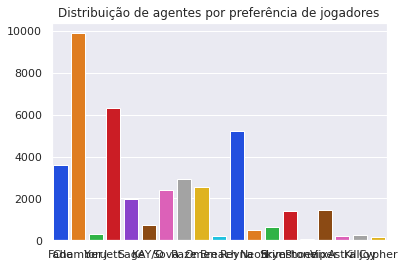

In [97]:
sns.barplot(x=df['agent_1'].unique(), y=agentsTotal, palette="bright").set(title='Distribuição de agentes por preferência de jogadores')

Através do histplot do seaborn conseguimos visualizar o percentual de jogadores por elo.

[Text(0.5, 1.0, 'Pecentual de de jogadores por elo')]

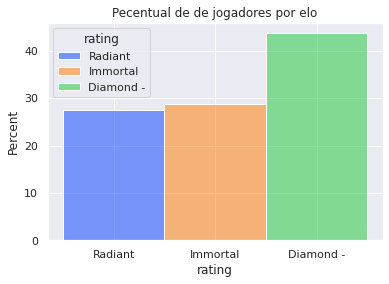

In [99]:
sns.histplot(data=df, x="rating", hue="rating", stat="percent", palette="bright").set(title='Pecentual de de jogadores por elo')

# Correlação 

Não entrava muito no intuito da pesquisa, mas acredito que seja viável realizar uma verificação de correlação dos dados da tabela para também conseguirmos compreender como funciona cada propriedade e também ver qual pode influenciar em qual.

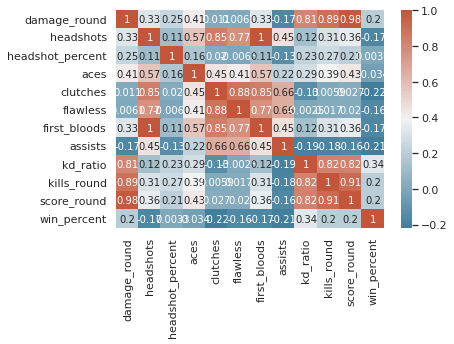

In [101]:
corr = df.corr()
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df.corr(),cmap=cmap, annot=True);

Esse gráfico de calor ajuda bastante para quem já compreende como o jogo funciona, e é interessante analisar que a quantidade de dano por rodada influencia fortemente na pontuação durante a rodada, algo que muitos jogadores não devem saber, e talvez ajudaria a subir de elo mais rapidamente.